In [39]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings("ignore")

## 1. Data Loading and Preparation
# Assuming your data is in a CSV file named 'eligibility_data.csv'
df = pd.read_csv('/kaggle/input/student-eligibility-dataset-100/sample_student_data.csv')  # Replace with your actual data source

# Display dataset info
print("Dataset Info:")
df.info()



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Theory    1000 non-null   float64
 1   Practice  1000 non-null   float64
 2   Decision  1000 non-null   object 
dtypes: float64(2), object(1)
memory usage: 23.6+ KB


In [40]:
print("\nFirst 5 rows:")
df.head()


First 5 rows:


,Theory,Practice,Decision
0,82.450712,96.792265,Eligible
1,72.926035,91.095604,Eligible
2,84.715328,80.715564,Eligible
3,97.845448,72.236759,Eligible
4,71.487699,88.378680,Eligible


In [41]:

## 2. Data Preprocessing
# Encode target variable
# label_encoder = LabelEncoder()
# df['Decision'] = label_encoder.fit_transform(df['Decision'])
# # Eligible = 1, Not eligible = 0 (you can verify with label_encoder.classes_)
# df.head()

# Map 'Eligible' to 1 and 'Not Eligible' to 0
df['Decision'] = df['Decision'].map({'Eligible': 1, 'Not eligible': 0})

df.head()

,Theory,Practice,Decision
0,82.450712,96.792265,1
1,72.926035,91.095604,1
2,84.715328,80.715564,1
3,97.845448,72.236759,1
4,71.487699,88.378680,1


In [42]:
# Save the label encoder (though we're using direct mapping in this case)
# If you switch back to using LabelEncoder, uncomment this:
# joblib.dump(label_encoder, 'label_encoder.pkl')
# print("Label encoder saved successfully as 'label_encoder.pkl'")

# Note: In current code we're using direct mapping, so label encoder isn't needed
# This section is included for completeness if you switch back to LabelEncoder

In [43]:

# Separate features and target
X = df[['Theory', 'Practice']]
y = df['Decision']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [44]:
X_train_scaled

array([[-0.32372658, -1.11335079],
       [ 0.02238696, -1.68789349],
       [-0.34194893,  1.86200202],
       ...,
       [ 0.18113154, -0.22077774],
       [ 0.04963583,  0.19802967],
       [-0.37580377,  2.01213555]])

In [45]:
X_test_scaled

array([[ 5.28617683e-01,  4.98925944e-01],
       [ 9.77045099e-01, -1.15856830e+00],
       [-1.90498384e+00, -1.90780792e-01],
       [-6.11533174e-01,  1.23732621e+00],
       [-1.17392165e+00,  4.72939195e-01],
       [ 9.29059082e-01,  9.17054749e-01],
       [-1.03608835e+00, -5.35231531e-01],
       [-9.52348476e-01, -1.96097815e+00],
       [ 6.20043946e-01,  1.75669115e-01],
       [-8.25464181e-01,  1.10909415e+00],
       [-4.74829100e-01,  6.16177746e-02],
       [ 6.28563041e-02, -1.64959687e+00],
       [ 8.14221727e-01, -1.04536935e+00],
       [-6.92130105e-01,  1.09781615e-01],
       [ 2.22855634e-01,  1.00493278e+00],
       [-8.59843975e-01, -3.82691107e-01],
       [ 8.98746651e-02,  4.83046749e-02],
       [ 1.03978777e+00, -6.81041909e-01],
       [ 9.85429765e-02,  6.59692265e-01],
       [-1.58830879e-01, -2.73682682e-01],
       [-6.42484215e-01,  1.14672930e+00],
       [ 2.56426730e-01, -8.43285539e-01],
       [ 4.82316535e-01,  1.63373572e+00],
       [ 2.

In [46]:
# Save the scaler object
joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved successfully as 'scaler.pkl'")

Scaler saved successfully as 'scaler.pkl'


In [47]:

## 3. Model Building
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),  # Regularization to prevent overfitting
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Add early stopping to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    restore_best_weights=True
)

# Print model architecture summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,305 (9.00 KB)

 Trainable params: 2,305 (9.00 KB)

 Non-trainable params: 0 (0.00 B)

<center><h1>### Verbose Levels in Keras/TensorFlow</h1></center>

| Value | Meaning                                      |
|-------|----------------------------------------------|
| 0     | Silent – No output shown                     |
| 1     | Progress bar – Shows progress bar            |
| 2     | One line per epoch – More compact logging    |


In [48]:

## 4. Model Training
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7173 - loss: 0.6345 - val_accuracy: 0.9000 - val_loss: 0.5203
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8822 - loss: 0.5119 - val_accuracy: 0.9375 - val_loss: 0.4055
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9085 - loss: 0.3991 - val_accuracy: 0.9563 - val_loss: 0.3159
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9250 - loss: 0.3302 - val_accuracy: 0.9625 - val_loss: 0.2494
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9379 - loss: 0.2599 - val_accuracy: 0.9688 - val_loss: 0.2023
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9307 - loss: 0.2170 - val_accuracy: 0.9688 - val_loss: 0.1683
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9545 - loss: 0.1756 - val_accuracy: 0.9750 - val_loss: 0.1413
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9512 - loss: 0.1677 - val_accuracy: 0.9688 - 

In [49]:

# Make predictions
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

print(y_pred)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[[1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [

In [50]:
y_test

521    1
737    1
740    0
660    1
411    1
      ..
408    1
332    1
208    1
613    0
78     1
Name: Decision, Length: 200, dtype: int64

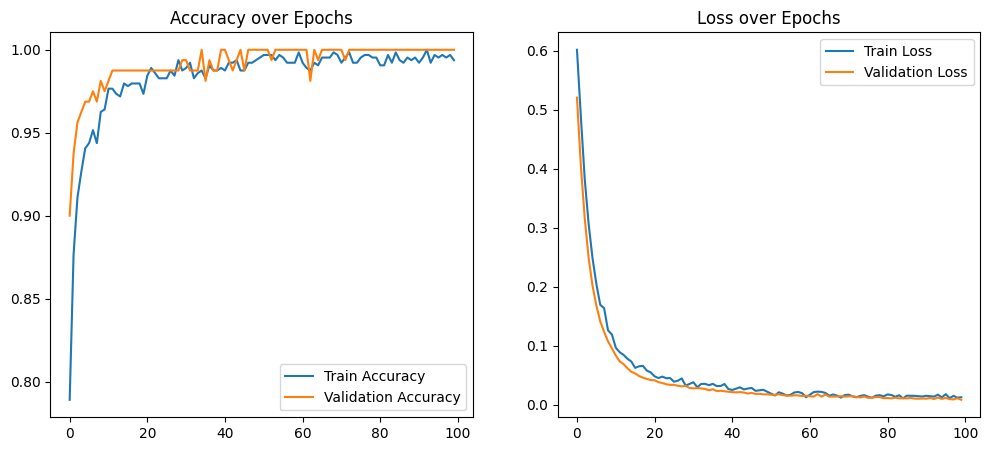

In [51]:

## 5. Model Evaluation
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()


<h1 style = 'color:blue'>Model Results Interpretation</h1>

In [58]:
#Model Results Interpretation
from tabulate import tabulate

# Show a sample of predictions in a table format
results_df = X_test.copy()
results_df['Actual'] = y_test.values
results_df['Prediction'] = y_pred

# Map back 1 -> 'Eligible', 0 -> 'Not eligible'
results_df['Prediction'] = results_df['Prediction'].map({1: 'Eligible', 0: 'Not eligible'})
results_df['Actual'] = results_df['Actual'].map({1: 'Eligible', 0: 'Not eligible'})

# Display first 10 predictions in a grid table
print("\nModel Prediction Results and Interpretation:")
print(tabulate(results_df.head(10), headers='keys', tablefmt='grid', showindex=False))



Model Prediction Results and Interpretation:
+----------+------------+--------------+--------------+
|   Theory |   Practice | Actual       | Prediction   |
+==========+============+==============+==============+
|  83.1504 |    86.9852 | Eligible     | Eligible     |
+----------+------------+--------------+--------------+
|  89.7404 |    67.1864 | Eligible     | Eligible     |
+----------+------------+--------------+--------------+
|  47.3869 |    78.7466 | Not eligible | Not eligible |
+----------+------------+--------------+--------------+
|  66.3951 |    95.8054 | Eligible     | Eligible     |
+----------+------------+--------------+--------------+
|  58.1304 |    86.6748 | Eligible     | Eligible     |
+----------+------------+--------------+--------------+
|  89.0352 |    91.9797 | Eligible     | Eligible     |
+----------+------------+--------------+--------------+
|  60.1559 |    74.6321 | Not eligible | Not eligible |
+----------+------------+--------------+--------------+
| 

In [53]:

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")



Test Accuracy: 1.0000
Test Loss: 0.0055


In [54]:

# Make predictions
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

y_pred

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


array([[1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
    

In [55]:
y_test

521    1
737    1
740    0
660    1
411    1
      ..
408    1
332    1
208    1
613    0
78     1
Name: Decision, Length: 200, dtype: int64

In [56]:
# Classification report
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Eligible','Not eligible']))



Classification Report:
              precision    recall  f1-score   support

    Eligible       1.00      1.00      1.00        40
Not eligible       1.00      1.00      1.00       160

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



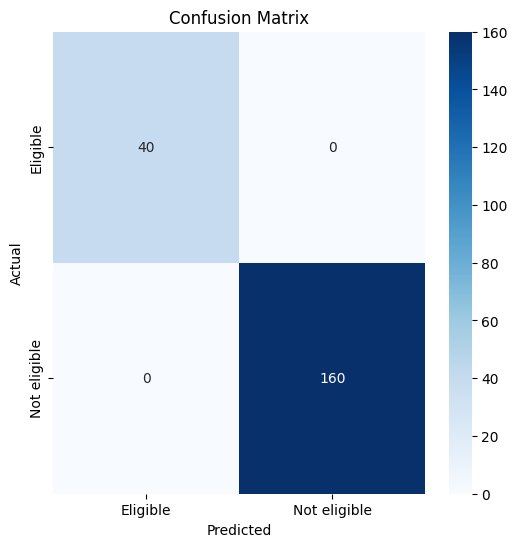

Model saved successfully as 'eligibility_predictor.h5'


In [57]:

# # Confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(6, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#             xticklabels=label_encoder.classes_,
#             yticklabels=label_encoder.classes_)
# plt.title('Confusion Matrix')
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.show()

# ## 6. Save the model (optional)
# ## 6. Save the model (optional)
# model.save('eligibility_predictor.h5')
# print("Model saved successfully as 'eligibility_predictor.h5'")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Eligible', 'Not eligible'],
            yticklabels=['Eligible', 'Not eligible'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ## 6. Save the model (optional)
model.save('eligibility_predictor.h5')
print("Model saved successfully as 'eligibility_predictor.h5'")

<!-- Model deployment -->
<h1><a href="https://huggingface.co/spaces/ntam0001/ANN">Model Deployed to Hugging Face Please Click Me</a></h1>